In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import plotly.plotly as py
import pandas as pd
import plotly
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('data/processed/merged_data.csv')

#print(data.shape)
display(data.head())
#data.describe()
#data.isnull().sum()

,Country,Year,Life expectancy at birth (years) Both sexes,Life expectancy at birth (years) Male,Life expectancy at birth (years) Female,Income Level,GDP per Capita,Current health expenditure (CHE) per capita in US$,Research and development expenditure (% of GDP)
0,Afghanistan,2016,62.7,61.0,64.5,L,561.778746,NaN,NaN
1,Afghanistan,2015,63.2,61.8,64.7,L,569.577923,60.1,NaN
2,Afghanistan,2014,63.0,61.7,64.4,L,629.345250,60.1,NaN
3,Afghanistan,2013,62.7,61.5,64.1,L,638.612543,56.0,NaN
4,Afghanistan,2012,62.2,60.9,63.6,L,669.009051,52.2,NaN


## Scatter Plot Matrix

/Users/annanau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



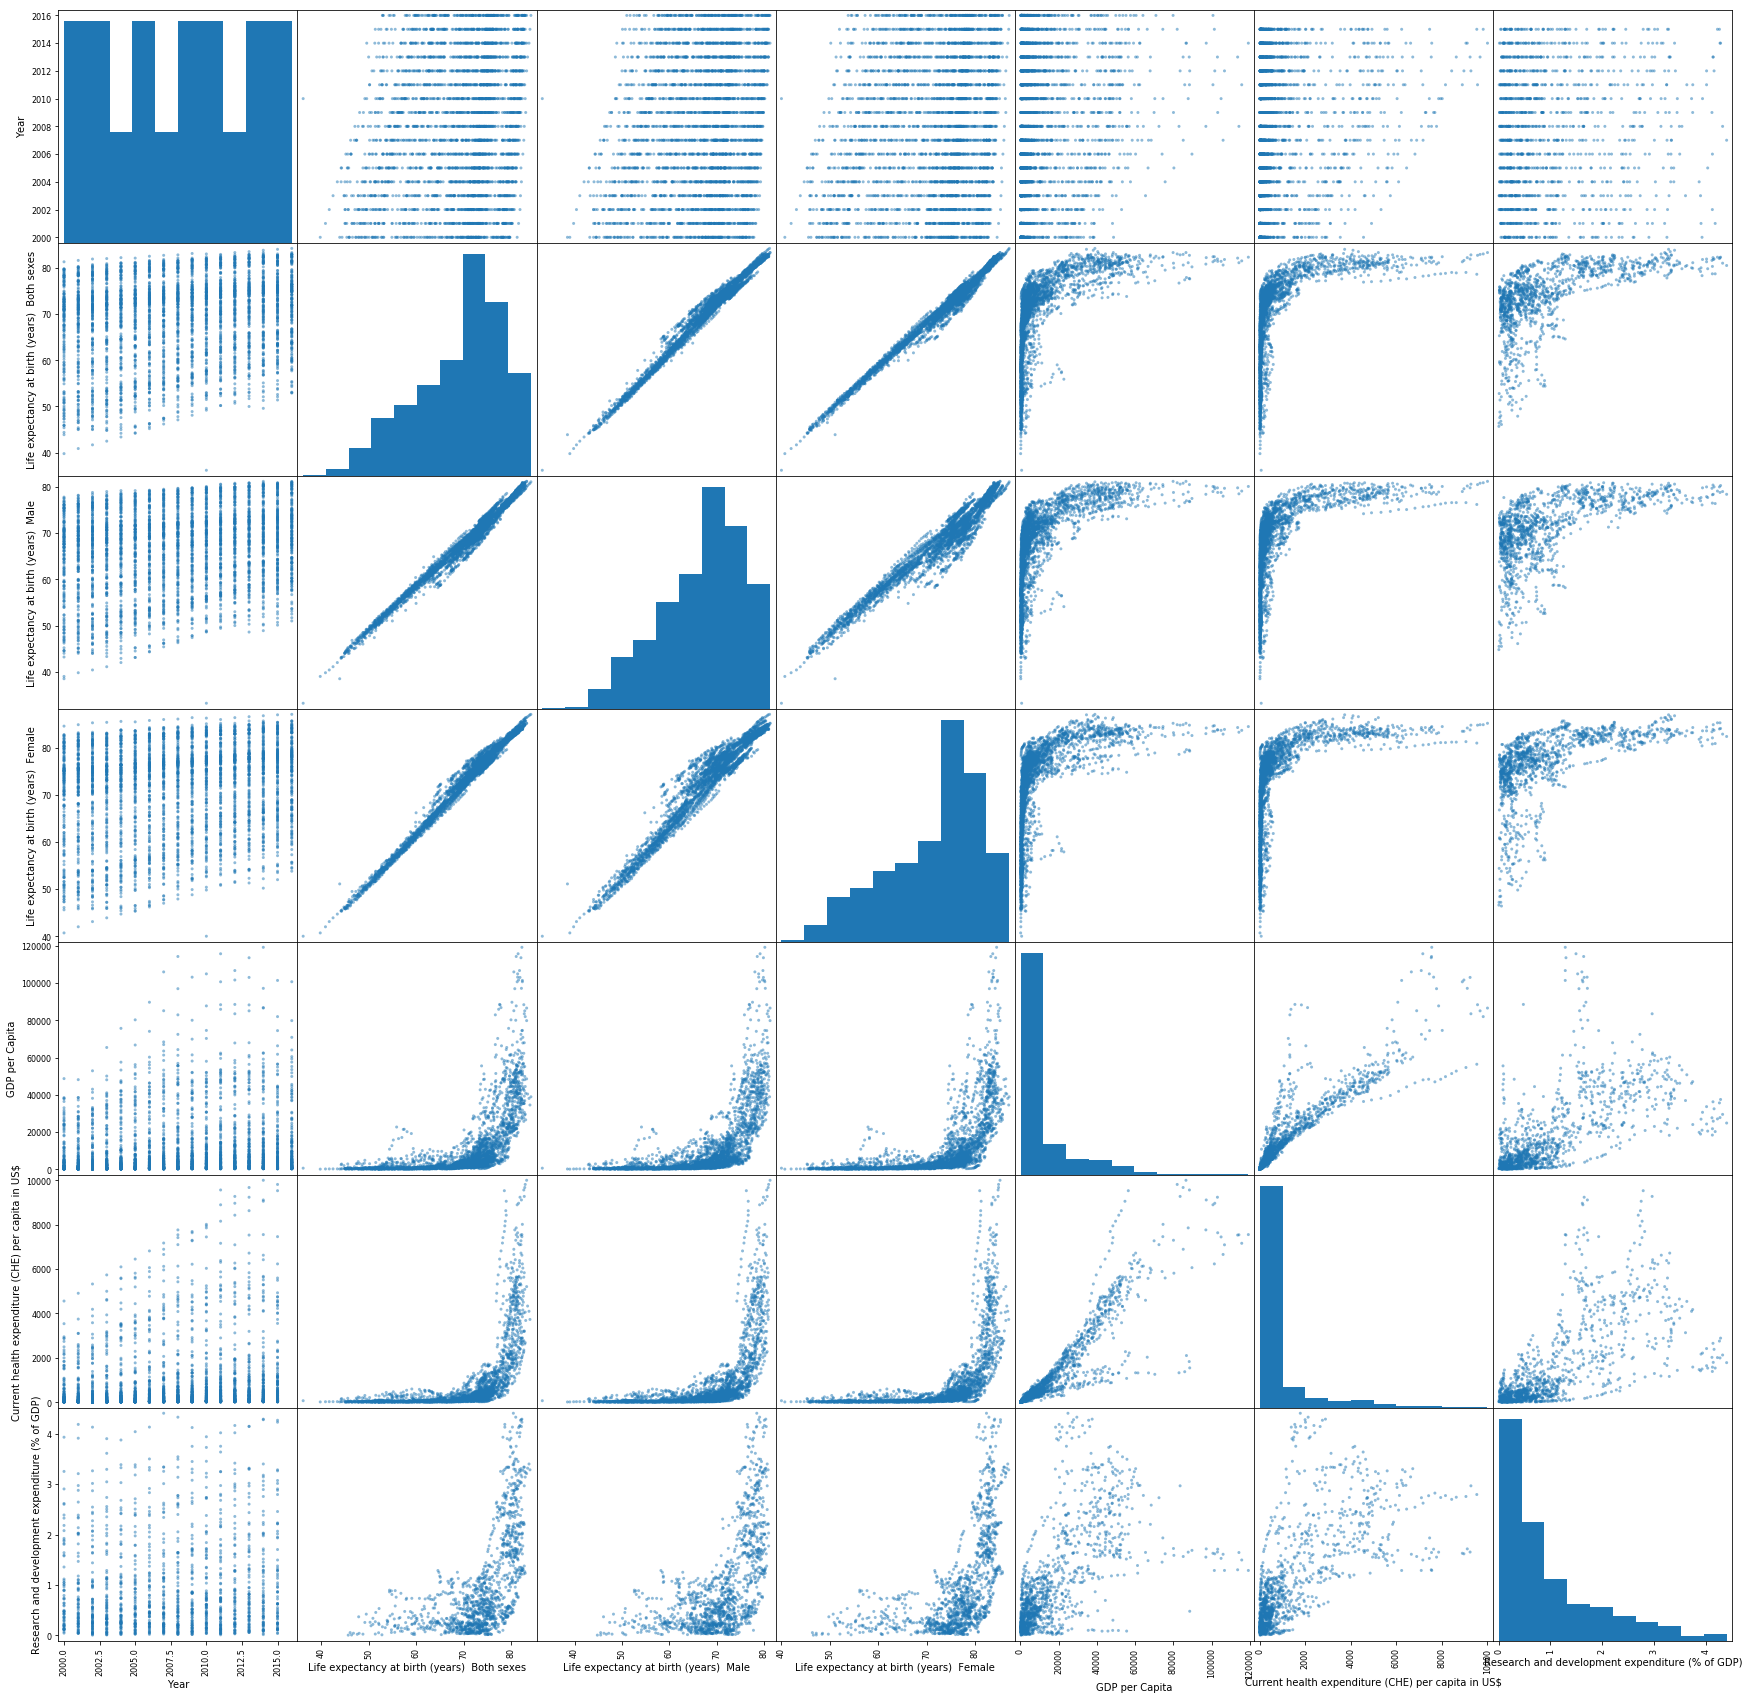

In [3]:
fig = plt.figure(figsize=(30,30))
ax = fig.subplots()
sm = pd.plotting.scatter_matrix(data, ax = ax)

## Correlation Matrix

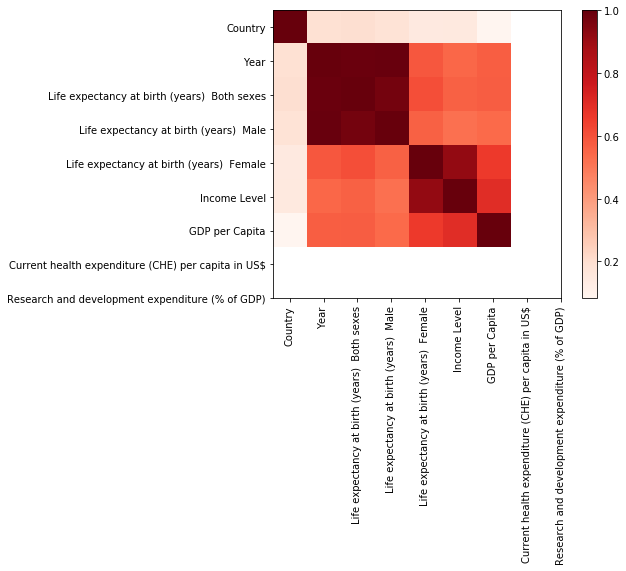

In [4]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plt.imshow(data.corr(), cmap = plt.cm.Reds, interpolation = 'nearest')
plt.colorbar()
ticks = [i for i in range(len(data.columns))]
plt.xticks(ticks, data.columns, rotation = 'vertical')
plt.yticks(ticks, data.columns)
plt.show()

## Male vs. Female Life Expectancy at Birth by Country (2014-2016)

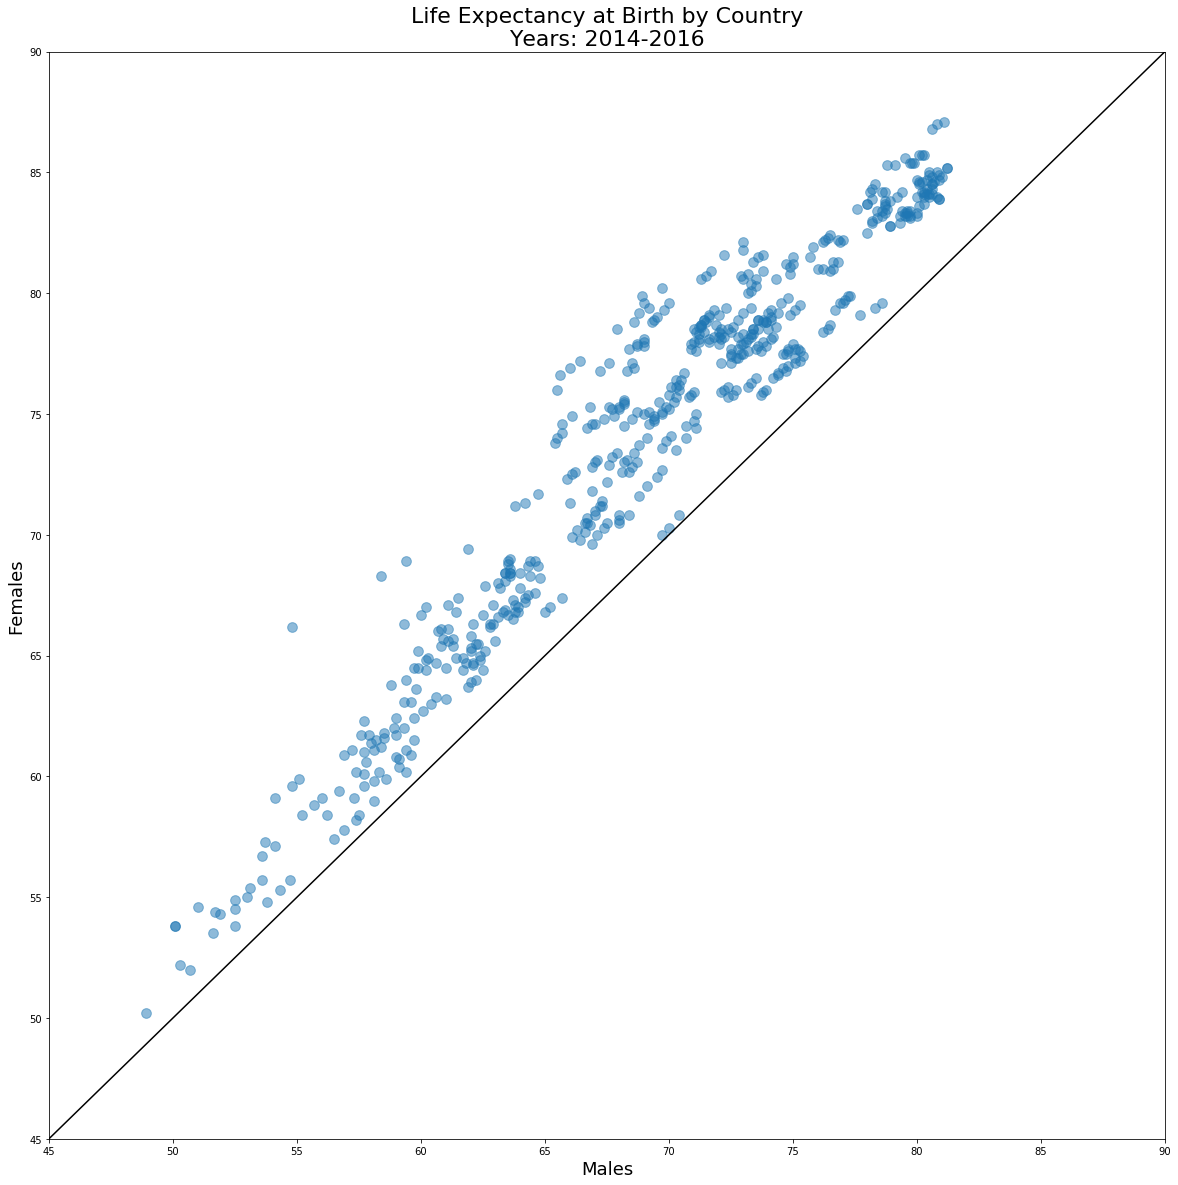

In [5]:
years = [2014, 2015, 2016]
area = np.pi*30
x = [45, 90]
y = [45, 90]

fig = plt.figure(figsize=(20,20))
plt.scatter(data[data.Year.isin(years)].iloc[:,3], data[data.Year.isin(years)].iloc[:,4], s=area,  alpha=0.5)
plt.axis([45, 90, 45, 90])
plt.title('Life Expectancy at Birth by Country\nYears: 2014-2016', fontsize=22)
plt.xlabel('Males', fontsize=18)
plt.ylabel('Females', fontsize=18)
plt.plot(x,y, color='black')
plt.show() 

## Choropleth Map: Average World Life Expectancy at Birth for Both Sexes (2016)

In [6]:
# load data with country codes
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
country_code = pd.read_csv(url)
country_code = country_code.iloc[:, [0,2]]
country_code.rename(index=str, columns={"alpha-3": "code"}, inplace=True)

# Replace country names of country_code dataframe to avoid missing values when merging
country_code['name'].replace(to_replace="Korea (Democratic People's Republic of)", value="Democratic People's Republic of Korea", inplace=True)
country_code['name'].replace(to_replace="Congo (Democratic Republic of the)", value="Democratic Republic of the Congo", inplace=True)
country_code['name'].replace(to_replace="Korea (Republic of)", value="Republic of Korea", inplace=True)
country_code['name'].replace(to_replace="Moldova (Republic of)", value="Republic of Moldova", inplace=True)
country_code['name'].replace(to_replace="Macedonia (the former Yugoslav Republic of)", value="The former Yugoslav republic of Macedonia", inplace=True)
country_code['name'].replace(to_replace="Tanzania, United Republic of", value="United Republic of Tanzania", inplace=True)
country_code['name'].replace(to_replace="Viet Nam", value="Vietnam", inplace=True)

In [7]:
# Merge data and country_code dataframes
data2 = pd.merge(data, country_code, how='outer', left_on='Country', 
                 right_on='name')
data2.drop('name', axis=1,  inplace=True)
data2_16 = data2[data2['Year'] == 2016] # 2016 obs. only

In [8]:
#data2_16[data2_16['code'].isna()]
#data2_16['code'].isnull().sum()
#data.loc[data['Country'] == 'United States of America'].head()
#code.loc[code['Country Name'] == 'Bolivia']

In [9]:
df = data2_16.groupby(['Country', 'code'], as_index=False)['Life expectancy at birth (years)  Both sexes'].mean()

plotly_data = [ dict(
        type = 'choropleth',
        locations = df['code'],
        z = df['Life expectancy at birth (years)  Both sexes'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            #tickprefix = '$',
            title = 'Years'),
      ) ]

layout = dict(
    title = 'Average World Life Expectancy at Birth for Both Sexes (2016)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=plotly_data, layout=layout)
py.iplot(fig, validate=False, filename='world-map2016')

## Life expectancy at Birth vs. GDP per capita

In [36]:
#print(data)
#data.isnull().sum()
data.head()

,Country,Year,Life expectancy at birth (years) Both sexes,Life expectancy at birth (years) Male,Life expectancy at birth (years) Female,Income Level,GDP per Capita,Current health expenditure (CHE) per capita in US$,Research and development expenditure (% of GDP)
0,Afghanistan,2016,62.7,61.0,64.5,L,561.778746,NaN,NaN
1,Afghanistan,2015,63.2,61.8,64.7,L,569.577923,60.1,NaN
2,Afghanistan,2014,63.0,61.7,64.4,L,629.345250,60.1,NaN
3,Afghanistan,2013,62.7,61.5,64.1,L,638.612543,56.0,NaN
4,Afghanistan,2012,62.2,60.9,63.6,L,669.009051,52.2,NaN


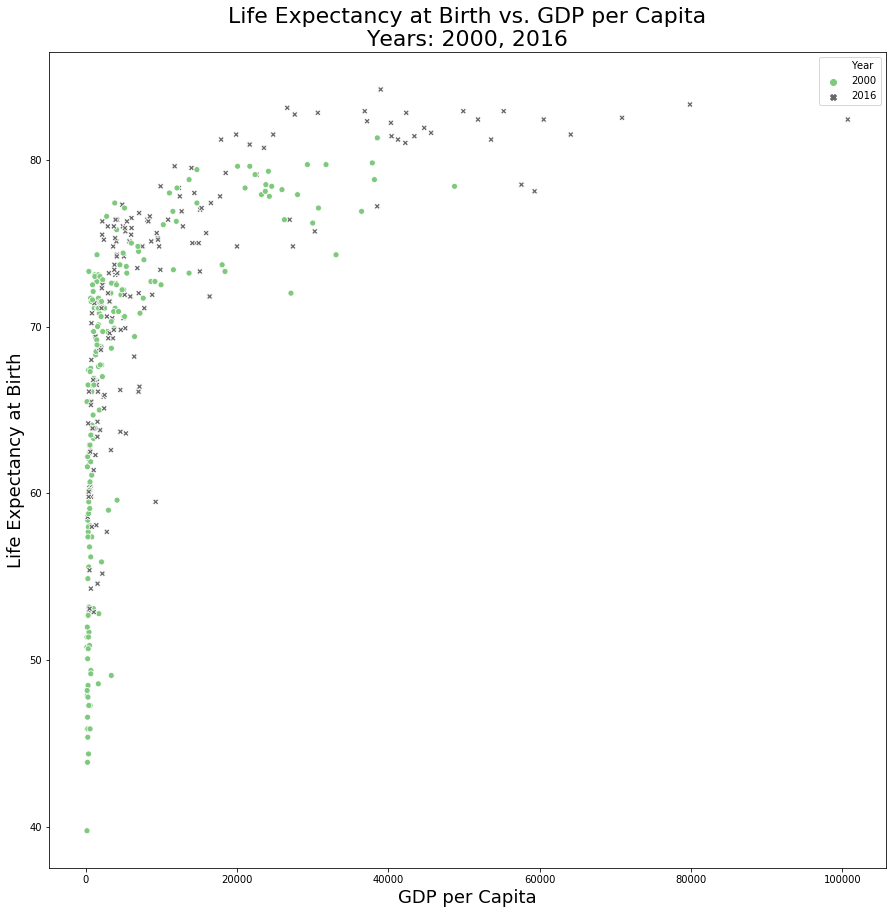

In [10]:
years = [2000, 2016]
#colors = ['red','blue']
data_00_16 = data[data.Year.isin(years)]

fig = plt.figure(figsize=(15,15))
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c=data[data.Year.isin(years)].iloc[:,1],
           #cmap='bwr', label=data[data.Year.isin(years)].iloc[:,1], alpha=0.5)
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c='bwr',
            #label=data[data.Year.isin(years)].iloc[:,1], alpha=0.5)
#plt.scatter(data[data.Year.isin(years)].iloc[:,6], data[data.Year.isin(years)].iloc[:,2], c=data[data.Year.isin(years)].iloc[:,1],
           #cmap='bwr', label=years, alpha=0.5)
# Add a column: the color depends of x and y values, but you can use whatever function.
sns.set_palette("Paired")
sns.scatterplot(x=data_00_16.iloc[:, 6], y=data_00_16.iloc[:, 2], hue=data_00_16['Year'], style=data_00_16['Year'],
               data=data_00_16, legend='full', palette='Accent')
plt.title('Life Expectancy at Birth vs. GDP per Capita\nYears: 2000, 2016', fontsize=22)
plt.xlabel('GDP per Capita', fontsize=18)
plt.ylabel('Life Expectancy at Birth', fontsize=18)

plt.show() 

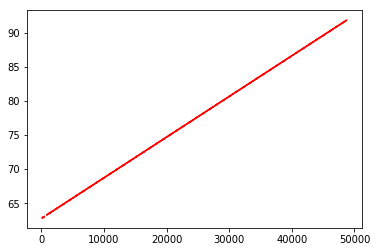

In [38]:
# random code
# add trend lines for year 2000
x_2000 = data[data.Year == 2000].iloc[:,6]
y_2000 = data[data.Year == 2000].iloc[:,2]
idx = np.isfinite(x_2000) & np.isfinite(y_2000)
z = np.polyfit(x=x_2000[idx], y=y_2000[idx], deg=1)
p = np.poly1d(z)
plt.plot(x_2000[idx],p(x_2000[idx]),"r--")

x_2000 = data[data.Year == 2000].iloc[:,6]
y_2000 = data[data.Year == 2000].iloc[:,2]
idx = np.isfinite(x_2000) & np.isfinite(y_2000)
ab = np.polyfit(np.log(x_2000[idx]), y_2000[idx], 1)
f = np.poly1d(z)
plt.plot(x_2000[idx],f(x_2000[idx]),"r--")

decision tree:
